Background: Inflation rate of Malaysia versus exchange rate between MYR and USD from 2005 to 2024

Objective: To analyze the impact of India inflation on the global economy

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exchangerate = pd.read_csv('AEXMAUS.csv')
exchangerate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  20 non-null     object 
 1   AEXMAUS           20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [3]:
MYinflationrate = pd.read_excel('Malaysia Inflation.xlsx')
MYinflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            65 non-null     int64  
 1   Inflation Rate  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
USinflationrate = pd.read_excel('US Inflation Rate.xlsx')
USinflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      241 non-null    datetime64[ns]
 1   All items  241 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [5]:
exchangerate['observation_date'] = pd.to_datetime(exchangerate['observation_date'])
exchangerate.insert(0, 'Year', exchangerate['observation_date'].dt.year)
exchangerate = exchangerate.drop(columns=['observation_date'])
exchangerate = exchangerate.rename(columns={'AEXMAUS':'Exchange Rate (MYR/USD)'})
exchangerate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     20 non-null     int64  
 1   Exchange Rate (MYR/USD)  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [6]:
MYinflationrate = MYinflationrate.rename(columns={'Inflation Rate':'Malaysia Inflation Rate'})
MYinflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     65 non-null     int64  
 1   Malaysia Inflation Rate  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
USinflationrate.insert(0, 'Year', USinflationrate['Month'].dt.year)
USinflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       241 non-null    int64         
 1   Month      241 non-null    datetime64[ns]
 2   All items  241 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.8 KB


In [8]:
USinflationrate = pd.pivot_table(USinflationrate, index='Year', values='All items', aggfunc='mean', fill_value=0)
USinflationrate.reset_index(inplace=True)
USinflationrate.columns.name = None
USinflationrate.index.name = None
USinflationrate = USinflationrate.rename(columns={'All items':'United States Inflation Rate'})
USinflationrate['United States Inflation Rate'] = USinflationrate['United States Inflation Rate']*100
USinflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          21 non-null     int64  
 1   United States Inflation Rate  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
inflationrate = MYinflationrate.merge(USinflationrate, on='Year', how='left')
inflationrate.reset_index(drop=True, inplace=True)
inflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          65 non-null     int64  
 1   Malaysia Inflation Rate       65 non-null     float64
 2   United States Inflation Rate  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [10]:
comparison = exchangerate.merge(inflationrate, on='Year', how='left')
comparison.reset_index(drop=True, inplace=True)
comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          20 non-null     int64  
 1   Exchange Rate (MYR/USD)       20 non-null     float64
 2   Malaysia Inflation Rate       20 non-null     float64
 3   United States Inflation Rate  20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 768.0 bytes


In [11]:
#fig = go.Figure(data=[go.Scatter(x=comparison['Year'],
#                                 y=comparison['Exchange Rate (MYR/USD)'],
#                                 mode='lines+markers',
#                                 marker=dict(size=8))])

#fig.update_layout(title='Trend of Exchange Rate (MYR/USD)',
#                  xaxis_title='Year',
#                  yaxis_title='Exchange Rate')
#fig.show()

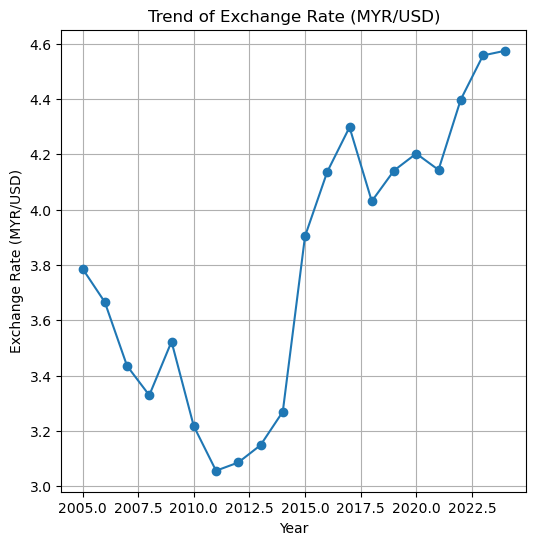

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(comparison['Year'], 
        comparison['Exchange Rate (MYR/USD)'], 
        marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Exchange Rate (MYR/USD)')
ax.set_title('Trend of Exchange Rate (MYR/USD)')
plt.grid(True)
plt.show()

In [13]:
#compare = comparison[['Year', 'Malaysia Inflation Rate', 'United States Inflation Rate']]

#fig = go.Figure()
#for col in ['Malaysia Inflation Rate', 'United States Inflation Rate']:
#    fig.add_trace(
#        go.Scatter(
#            x=compare['Year'],
#            y=compare[col],
#            mode='lines+markers',
#            name=col))

#fig.update_layout(title='Inflation Rate Comparison: Malaysia vs United States',
#                  xaxis_title='Year',
#                  yaxis_title='Inflation Rate (%)')

#fig.show()

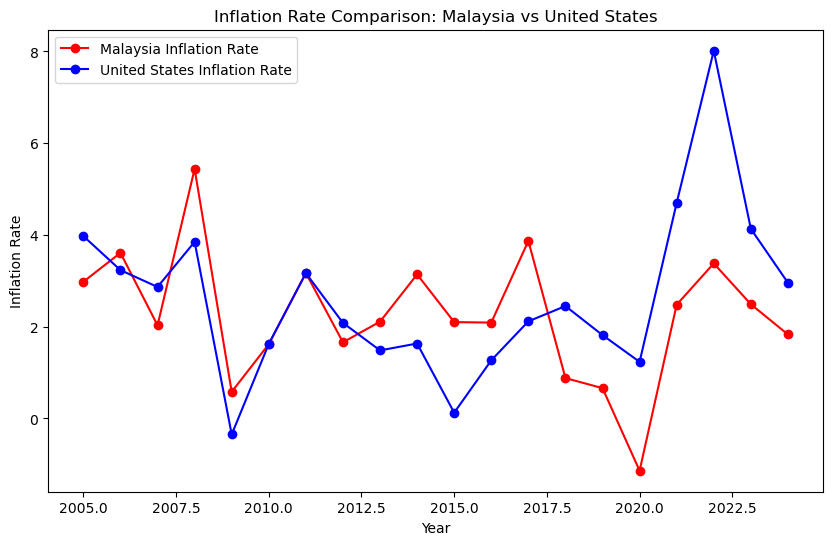

In [14]:
compare = comparison[['Year', 'Malaysia Inflation Rate', 'United States Inflation Rate']]


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(comparison['Year'], comparison['Malaysia Inflation Rate'], 
        linestyle='-',  
        color='red', 
        marker='o',      
        label='Malaysia Inflation Rate')
ax.plot(comparison['Year'], comparison['United States Inflation Rate'], 
        linestyle='-', 
        color='blue', 
        marker='o', 
        label='United States Inflation Rate')
ax.set_title('Inflation Rate Comparison: Malaysia vs United States')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate')
ax.legend()
plt.show()

For much of the period, both countries experienced similar peaks and troughs in their inflation rates, suggesting they were often responding to shared global economic shocks.

In [15]:
#corrdf = comparison[['Exchange Rate (MYR/USD)', 'Malaysia Inflation Rate', 'United States Inflation Rate']]
#corr = corrdf.corr()
#fig = go.Figure(data=go.Heatmap(z=corr.values,
#                                x=corr.columns,
#                                y=corr.columns,
#                                colorscale='RdBu_r',
#                                text=corr.round(2).values, 
#                                texttemplate="%{text}")) 
#fig.update_layout(title='Exchange Rate and Inflation Rate Correlation Matrix Heatmap')
#fig.show()

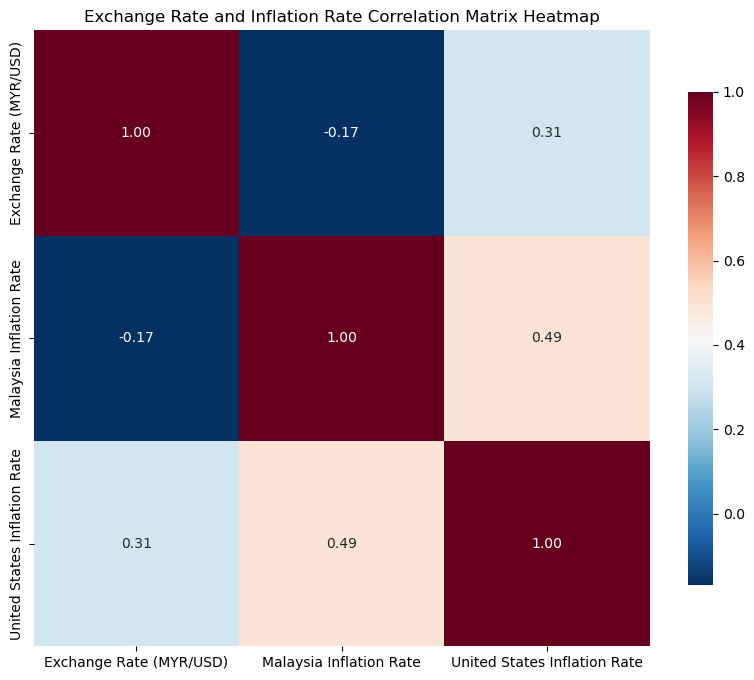

In [16]:
corrdf = comparison[['Exchange Rate (MYR/USD)', 'Malaysia Inflation Rate', 'United States Inflation Rate']]
corr = corrdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,
            fmt=".2f",
            cmap='RdBu_r',
            square=True, 
            cbar_kws={'shrink': 0.8})
plt.title('Exchange Rate and Inflation Rate Correlation Matrix Heatmap')
plt.show()

A negative correlation between Exchange Rate (MYR/USD) and Malaysia Inflation Rate (-0.17) suggests that when Malaysia Inflation Rate rises, the exchange rate tends to fall weakly.

A positive correlation between Exchange Rate (MYR/USD) and United States Inflation Rate (0.31) suggests that when the US Inflation Rate rises, the exchange rate tends to rise moderately.

A strong positive correlation of Inflation Rate between United States and Malaysia (0.49) suggests that when the United States inflation rate rises, the Malaysia Inflation Rate tends to rise moderately.

In [17]:
initial_exchange_rate = comparison['Exchange Rate (MYR/USD)'].iloc[0]
initial_exchange_rate

3.7869

In [18]:
#calculate the relative PPP
#relative PPP = expected exchange rate
comparison['Expected Exchange Rate'] = initial_exchange_rate * (
    (1 + comparison['Malaysia Inflation Rate'] / 100) / (1 + comparison['United States Inflation Rate'] / 100)
).cumprod()
comparison.head()

,Year,Exchange Rate (MYR/USD),Malaysia Inflation Rate,United States Inflation Rate,Expected Exchange Rate
0,2005,3.7869,2.98,3.975000,3.750661
1,2006,3.6661,3.61,3.233333,3.764346
2,2007,3.4354,2.03,2.866667,3.733729
3,2008,3.3292,5.44,3.850000,3.790894
4,2009,3.5231,0.58,-0.350000,3.826273


In [19]:
#fig = go.Figure()
#for col in ['Exchange Rate (MYR/USD)', 'Expected Exchange Rate']:
#    if col == 'Expected Exchange Rate':
#        fig.add_trace(go.Scatter(
#            x=comparison['Year'],
#            y=comparison[col],
#            mode='lines+markers',
#            name='Expected Exchange Rate (MYR/USD)',
#            line=dict(dash='dot')))
#    else:
#        fig.add_trace(go.Scatter(
#            x=comparison['Year'],
#            y=comparison[col],
#            name='Actual Exchange Rate (MYR/USD)',
#            mode='lines+markers'))

#fig.update_layout(title='Actual vs Expected Exchanged Rate (PPP)',
#                  xaxis_title='Year',
#                  yaxis_title='Exchanged Rate')

#fig.show()

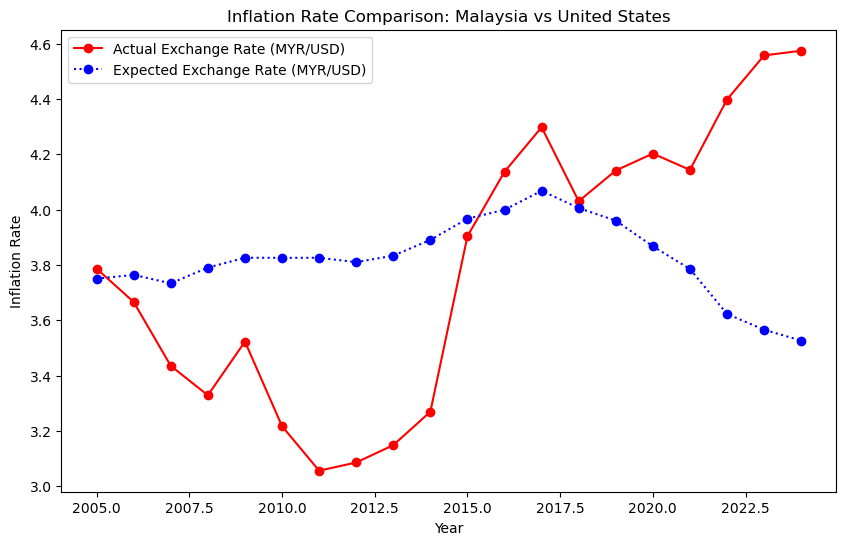

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(comparison['Year'], comparison['Exchange Rate (MYR/USD)'], 
        linestyle='-',  
        color='red', 
        marker='o',      
        label='Actual Exchange Rate (MYR/USD)')
ax.plot(comparison['Year'], comparison['Expected Exchange Rate'], 
        linestyle=':', 
        color='blue', 
        marker='o', 
        label='Expected Exchange Rate (MYR/USD)')
ax.set_title('Inflation Rate Comparison: Malaysia vs United States')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate')
ax.legend()
plt.show()

The actual exchange rate (blue line) is consistently below the expected exchange rate (red dotted line) from 2006 to 2015, which suggesting the Malaysia Ringgit (MYR) is undervalued against the US Dollar (USD). After that, the actual exchange rate is above the expected exchange rate from 2016 to 2024 except for 2018, which both exchange rate and expected exchange rate are nearly equal to each other.

Key Findings: 
1. There is a moderate relationship between the inflation rates of Malaysia and United States from 2005 to 2024. This indicates that both countries' price levels are significantly influenced by shared external factors.
2. The Actual Exchange Rate was consistently below the Expected PPP Rate from 2005 to 2015. The Actual Exchange Rate surged above the Expected PPP Rate from 2016 to 2024, excluding 2018 where it briefly returned to near fair value.
3. The gap between the Actual Exchange Rate (market rate) and the Expected PPP Rate (theoretical equilibrium) appears to widen significantly from year 2019 to 2024. This confirms a growing disconnect between the Ringgit's market performance and its purchasing power fundamentals.

data source: 

MYR/USD Exchange Rate: https://fred.stlouisfed.org/series/AEXMAUS

Malaysia Inflation: https://open.dosm.gov.my/data-catalogue/cpi_annual_inflation?visual=table

United States Exchange Rate: https://www.bls.gov/charts/consumer-price-index/consumer-price-index-by-category-line-chart.htm

Reference: https://amanxai.com/2024/08/12/inflation-impact-analysis-with-python/